In [1]:
import os

In [2]:
os.listdir()

['train.csv', 'test.csv', '.ipynb_checkpoints', 'Regression_Practice.ipynb']

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [8]:
train.shape

(1460, 81)

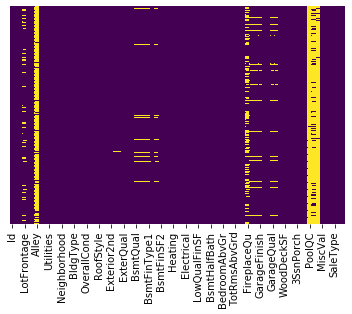

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
train.isnull().sum().nlargest(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
dtype: int64

In [12]:
nulls = train.isnull().sum()
nulls[nulls > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [14]:
## Fill Missing Values
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [15]:
train.drop(['Alley','MiscFeature','PoolQC','Fence'],axis=1,inplace=True)

In [16]:
def mode_filling(feature):
    train[feature] = train[feature].fillna(train[feature].mode()[0])

In [17]:
mode_filling('BsmtCond')
mode_filling('BsmtQual')

In [18]:
mode_filling('GarageType')
mode_filling('GarageFinish')
mode_filling('GarageCond')
mode_filling('GarageQual')

In [19]:
train.drop('GarageYrBlt',axis=1,inplace=True)

In [20]:
train.drop('Id',axis=1,inplace=True)

In [21]:
train.shape

(1460, 75)

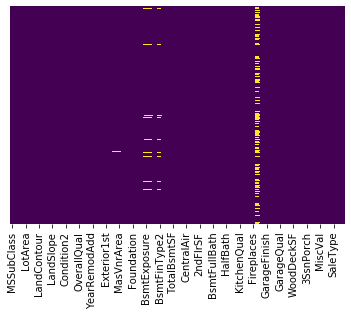

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
mode_filling('MasVnrType')
mode_filling('MasVnrArea')

In [24]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [25]:
mode_filling('BsmtExposure')

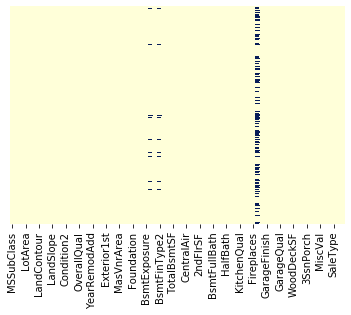

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [27]:
mode_filling('BsmtFinType1')
mode_filling('BsmtFinType2')

In [28]:
mode_filling('FireplaceQu')

In [29]:
train.dropna(inplace=True)

In [30]:
nulls = train.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

In [31]:
train.shape

(1459, 75)

### For Test Data

In [32]:
test = pd.read_csv('test.csv')

In [33]:
def mode_filling_test(feature):
    test[feature] = test[feature].fillna(test[feature].mode()[0])

In [34]:
test.drop(['Id','Alley','MiscFeature','PoolQC','Fence'],axis=1,inplace=True)

In [35]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [36]:
mode_filling_test('MSZoning')

In [37]:
mode_filling_test('BsmtQual')
mode_filling_test('BsmtCond')
mode_filling_test('FireplaceQu')
mode_filling_test('GarageType')
mode_filling_test('GarageFinish')
mode_filling_test('GarageQual')
mode_filling_test('GarageCond')
mode_filling_test('MasVnrType')
mode_filling_test('MasVnrArea')
mode_filling_test('BsmtExposure')
mode_filling_test('BsmtFinType2')
mode_filling_test('Utilities')
mode_filling_test('Exterior1st')
mode_filling_test('Exterior2nd')
mode_filling_test('BsmtFinType1')
mode_filling_test('BsmtFinSF1')
mode_filling_test('BsmtFinSF2')


In [38]:
mode_filling_test('BsmtUnfSF')
mode_filling_test('TotalBsmtSF')
mode_filling_test('BsmtFullBath')
mode_filling_test('BsmtHalfBath')
mode_filling_test('KitchenQual')
mode_filling_test('Functional')
mode_filling_test('GarageCars')
mode_filling_test('GarageArea')
mode_filling_test('SaleType')

In [39]:
test.drop('GarageYrBlt',axis=1,inplace=True)

In [40]:
nuls = test.isnull().sum()
nuls[nuls > 0]

Series([], dtype: int64)

### EDA

In [41]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [42]:
len(columns)

39

In [43]:
def one_hot_multicols(multicolumns):
    df_final = final_df

In [44]:
test.to_csv('test_cleaned.csv',index=False)

In [45]:
train.to_csv('train_cleaned.csv',index=False)